<a href="https://colab.research.google.com/github/Gokulnaath07/MachineLearning/blob/main/Supervised_finalProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read csv file
dt=pd.read_csv('fictional_balanced.csv')
dt.head(5)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Power Score,Win Rate,Ability Effectiveness,Weakness Impact
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0,6.000000,23.870968,19.022688,92.464678
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0,6.666667,29.870130,19.022688,92.464678
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0,6.666667,29.870130,19.022688,64.056939
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0,7.000000,29.496403,19.022688,92.464678
4,Flash,Marvel,7,6,2,Invisibility,Magic,0,5.000000,28.668942,32.189542,64.056939


In [3]:
dt=dt.sample(frac=1, random_state=42)
print(dt)

            Character   Universe  Strength  Speed  Intelligence  \
2236  Captain America  DC Comics         4      4             2   
668          Iron Man  DC Comics        10     10             9   
2005       Spider-Man     Marvel         7      6             1   
808              Thor     Marvel         4      5             9   
2053             Thor  DC Comics         5      3             7   
...               ...        ...       ...    ...           ...   
1638           Batman  DC Comics         7      5             6   
1095     Wonder Woman     Marvel         3      8             1   
1130           Batman     Marvel         4      1             6   
1294  Captain America  DC Comics        10      9             6   
860          Superman     Marvel         2      9             6   

     SpecialAbilities    Weaknesses  BattleOutcome  Power Score   Win Rate  \
2236   Super Strength         Magic              0     3.333333  28.880866   
668            Flight         Magic    

In [4]:
dt['Character'].unique()

array(['Captain America', 'Iron Man', 'Spider-Man', 'Thor',
       'Wonder Woman', 'Superman', 'Batman', 'Flash'], dtype=object)

In [5]:
dt['SpecialAbilities'].unique()


array(['Super Strength', 'Flight', 'Invisibility', 'Telekinesis'],
      dtype=object)

In [6]:
dt['Universe'].unique()

array(['DC Comics', 'Marvel'], dtype=object)

In [7]:
dt['Weaknesses'].unique()

array(['Magic', 'Silver', 'Kryptonite', 'Wooden Stake'], dtype=object)

In [8]:
uni_change={'DC Comics': 0, 'Marvel':1}
dt['Universe']=dt['Universe'].map(uni_change)
dt.head(5)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Power Score,Win Rate,Ability Effectiveness,Weakness Impact
2236,Captain America,0,4,4,2,Super Strength,Magic,0,3.333333,28.880866,41.463415,64.056939
668,Iron Man,0,10,10,9,Flight,Magic,1,9.666667,29.870130,18.918919,64.056939
2005,Spider-Man,1,7,6,1,Invisibility,Silver,0,4.666667,29.496403,32.189542,61.180680
808,Thor,1,4,5,9,Flight,Magic,0,6.000000,27.759197,18.918919,64.056939
2053,Thor,0,5,3,7,Invisibility,Magic,0,5.000000,27.759197,32.189542,64.056939


In [9]:
#one hot encoding
df_encoded=pd.get_dummies(columns=['SpecialAbilities','Weaknesses'], prefix=['SpecialAbilities','Weaknesses'], data=dt)

#print(df_encoded)

In [10]:
for col in df_encoded.columns:
  if col.startswith(('SpecialAbilities_', 'Weaknesses_')):
    df_encoded[col]=df_encoded[col].astype(int)
    print(col)
print(df_encoded.head(5))

SpecialAbilities_Flight
SpecialAbilities_Invisibility
SpecialAbilities_Super Strength
SpecialAbilities_Telekinesis
Weaknesses_Kryptonite
Weaknesses_Magic
Weaknesses_Silver
Weaknesses_Wooden Stake
            Character  Universe  Strength  Speed  Intelligence  BattleOutcome  \
2236  Captain America         0         4      4             2              0   
668          Iron Man         0        10     10             9              1   
2005       Spider-Man         1         7      6             1              0   
808              Thor         1         4      5             9              0   
2053             Thor         0         5      3             7              0   

      Power Score   Win Rate  Ability Effectiveness  Weakness Impact   \
2236     3.333333  28.880866              41.463415         64.056939   
668      9.666667  29.870130              18.918919         64.056939   
2005     4.666667  29.496403              32.189542         61.180680   
808      6.000000  27.759

In [11]:
df_encoded.head(5)

,Character,Universe,Strength,Speed,Intelligence,BattleOutcome,Power Score,Win Rate,Ability Effectiveness,Weakness Impact,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
2236,Captain America,0,4,4,2,0,3.333333,28.880866,41.463415,64.056939,0,0,1,0,0,1,0,0
668,Iron Man,0,10,10,9,1,9.666667,29.870130,18.918919,64.056939,1,0,0,0,0,1,0,0
2005,Spider-Man,1,7,6,1,0,4.666667,29.496403,32.189542,61.180680,0,1,0,0,0,0,1,0
808,Thor,1,4,5,9,0,6.000000,27.759197,18.918919,64.056939,1,0,0,0,0,1,0,0
2053,Thor,0,5,3,7,0,5.000000,27.759197,32.189542,64.056939,0,1,0,0,0,1,0,0


In [12]:
weakness_ability_impact=df_encoded.groupby(['Weaknesses_Kryptonite','Weaknesses_Magic','Weaknesses_Silver','Weaknesses_Wooden Stake',
                                    'SpecialAbilities_Flight','SpecialAbilities_Invisibility','SpecialAbilities_Super Strength',
                                    'SpecialAbilities_Telekinesis'])['BattleOutcome'].mean().sort_values()

print(weakness_ability_impact)

Weaknesses_Kryptonite  Weaknesses_Magic  Weaknesses_Silver  Weaknesses_Wooden Stake  SpecialAbilities_Flight  SpecialAbilities_Invisibility  SpecialAbilities_Super Strength  SpecialAbilities_Telekinesis
1                      0                 0                  0                        0                        0                              0                                1                               0.037736
                                                                                     1                        0                              0                                0                               0.046512
                                                                                     0                        1                              0                                0                               0.092025
                                                                                                              0                              1          

In [13]:
df_encoded.columns

Index(['Character', 'Universe', 'Strength', 'Speed', 'Intelligence',
       'BattleOutcome', 'Power Score', 'Win Rate', 'Ability Effectiveness',
       'Weakness Impact ', 'SpecialAbilities_Flight',
       'SpecialAbilities_Invisibility', 'SpecialAbilities_Super Strength',
       'SpecialAbilities_Telekinesis', 'Weaknesses_Kryptonite',
       'Weaknesses_Magic', 'Weaknesses_Silver', 'Weaknesses_Wooden Stake'],
      dtype='object')

In [14]:
correlation_matrix=df_encoded[['Strength', 'Speed', 'Intelligence',
       'Power Score', 'Win Rate', 'Ability Effectiveness',
       'Weakness Impact ', 'SpecialAbilities_Flight',
       'SpecialAbilities_Invisibility', 'SpecialAbilities_Super Strength',
       'SpecialAbilities_Telekinesis', 'Weaknesses_Kryptonite',
       'Weaknesses_Magic', 'Weaknesses_Silver', 'Weaknesses_Wooden Stake', 'Universe', 'BattleOutcome']].corr()
print(correlation_matrix)

                                 Strength     Speed  Intelligence  \
Strength                         1.000000 -0.041399      0.011212   
Speed                           -0.041399  1.000000     -0.001245   
Intelligence                     0.011212 -0.001245      1.000000   
Power Score                      0.570843  0.555518      0.587416   
Win Rate                         0.009600  0.021795      0.030125   
Ability Effectiveness           -0.017418 -0.002457     -0.008016   
Weakness Impact                  0.002502 -0.010298      0.020052   
SpecialAbilities_Flight          0.012473  0.003750     -0.000716   
SpecialAbilities_Invisibility   -0.010036  0.054004      0.001995   
SpecialAbilities_Super Strength -0.010994 -0.034757     -0.009053   
SpecialAbilities_Telekinesis     0.008647 -0.024210      0.007743   
Weaknesses_Kryptonite            0.009233 -0.007996      0.025446   
Weaknesses_Magic                -0.006834 -0.009251     -0.006119   
Weaknesses_Silver                0

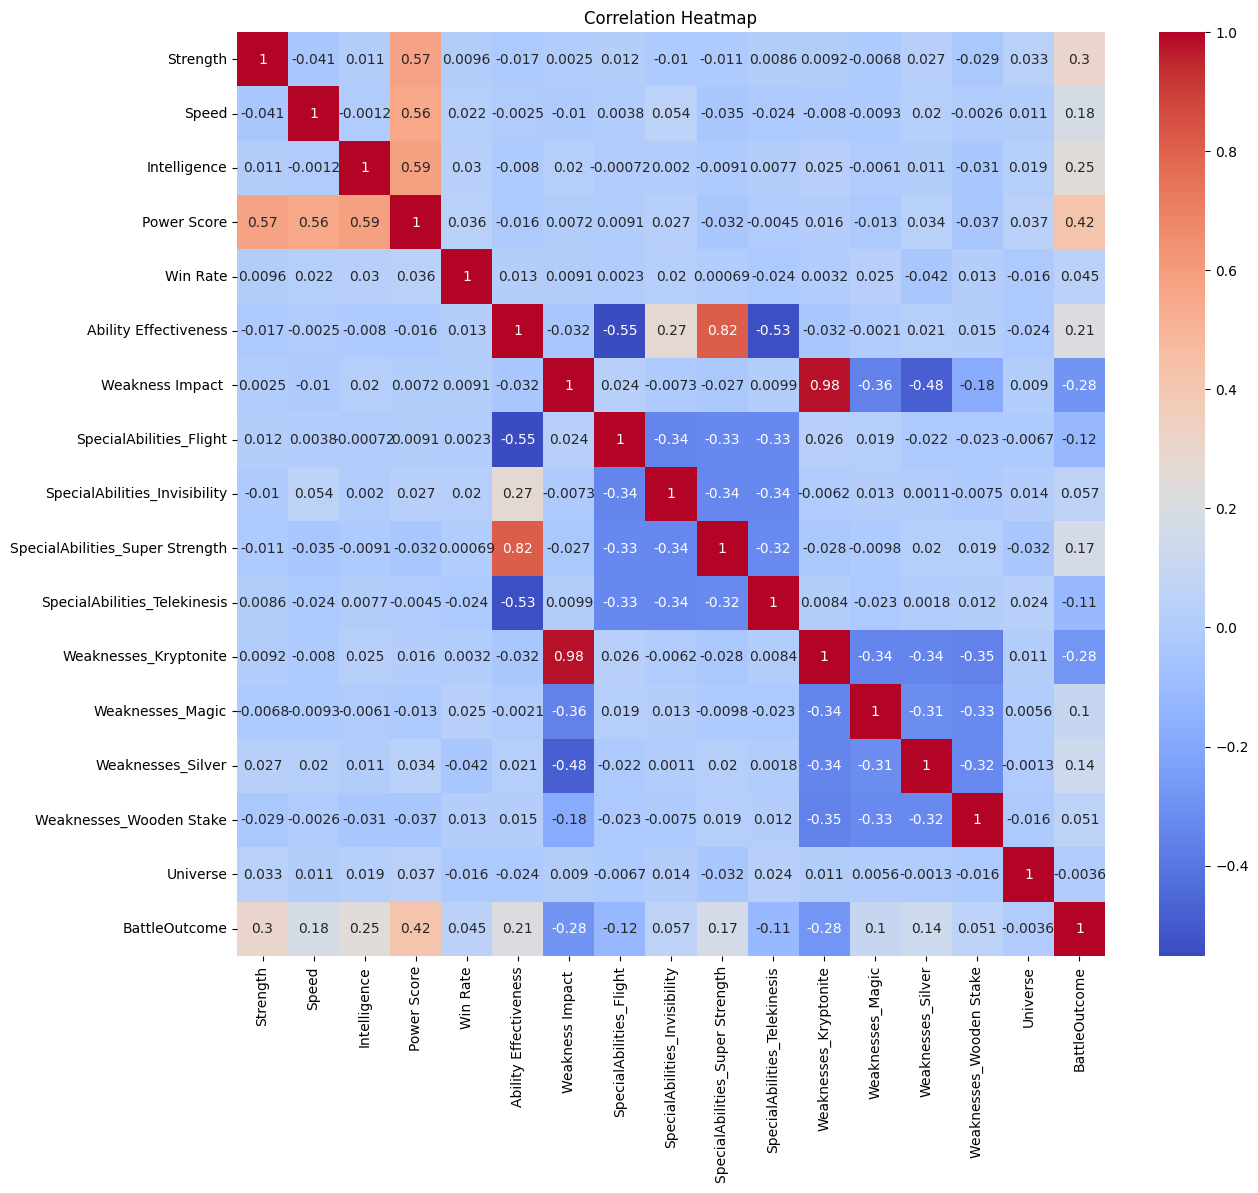

In [15]:
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df_check=df_encoded.isnull().sum()
print(df_check)

Character                          0
Universe                           0
Strength                           0
Speed                              0
Intelligence                       0
BattleOutcome                      0
Power Score                        0
Win Rate                           0
Ability Effectiveness              0
Weakness Impact                    0
SpecialAbilities_Flight            0
SpecialAbilities_Invisibility      0
SpecialAbilities_Super Strength    0
SpecialAbilities_Telekinesis       0
Weaknesses_Kryptonite              0
Weaknesses_Magic                   0
Weaknesses_Silver                  0
Weaknesses_Wooden Stake            0
dtype: int64


In [17]:
#check duplicates
df_check_dupes=df_encoded.duplicated().sum()
print(df_check_dupes)
df_encoded.drop_duplicates()

6


,Character,Universe,Strength,Speed,Intelligence,BattleOutcome,Power Score,Win Rate,Ability Effectiveness,Weakness Impact,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
2236,Captain America,0,4,4,2,0,3.333333,28.880866,41.463415,64.056939,0,0,1,0,0,1,0,0
668,Iron Man,0,10,10,9,1,9.666667,29.870130,18.918919,64.056939,1,0,0,0,0,1,0,0
2005,Spider-Man,1,7,6,1,0,4.666667,29.496403,32.189542,61.180680,0,1,0,0,0,0,1,0
808,Thor,1,4,5,9,0,6.000000,27.759197,18.918919,64.056939,1,0,0,0,0,1,0,0
2053,Thor,0,5,3,7,0,5.000000,27.759197,32.189542,64.056939,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Batman,0,7,5,6,0,6.000000,29.390681,41.463415,92.464678,0,0,1,0,1,0,0,0
1095,Wonder Woman,1,3,8,1,0,4.000000,23.870968,19.022688,92.464678,0,0,0,1,1,0,0,0
1130,Batman,1,4,1,6,1,3.666667,29.390681,32.189542,64.056939,0,1,0,0,0,1,0,0
1294,Captain America,0,10,9,6,1,8.333333,28.880866,32.189542,68.128162,0,1,0,0,0,0,0,1


In [18]:
from sklearn.preprocessing import MinMaxScaler

minMaxScale=MinMaxScaler()
cols=['Strength', 'Speed', 'Intelligence',
       'Power Score', 'Win Rate', 'Ability Effectiveness',
       'Weakness Impact ']
df_encoded[cols]=minMaxScale.fit_transform(df_encoded[cols])
df_encoded.head(5)

,Character,Universe,Strength,Speed,Intelligence,BattleOutcome,Power Score,Win Rate,Ability Effectiveness,Weakness Impact,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
2236,Captain America,0,0.333333,0.333333,0.111111,0,0.230769,0.835100,1.000000,0.09194,0,0,1,0,0,1,0,0
668,Iron Man,0,1.000000,1.000000,0.888889,1,0.961538,1.000000,0.000000,0.09194,1,0,0,0,0,1,0,0
2005,Spider-Man,1,0.666667,0.555556,0.000000,0,0.384615,0.937703,0.588641,0.00000,0,1,0,0,0,0,1,0
808,Thor,1,0.333333,0.444444,0.888889,0,0.538462,0.648129,0.000000,0.09194,1,0,0,0,0,1,0,0
2053,Thor,0,0.444444,0.222222,0.666667,0,0.423077,0.648129,0.588641,0.09194,0,1,0,0,0,1,0,0


In [19]:
corr_mat=df_encoded[['Strength', 'Speed', 'Intelligence',
       'Power Score', 'Win Rate', 'Ability Effectiveness',
       'Weakness Impact ', 'SpecialAbilities_Flight',
       'SpecialAbilities_Invisibility', 'SpecialAbilities_Super Strength',
       'SpecialAbilities_Telekinesis', 'Weaknesses_Kryptonite',
       'Weaknesses_Magic', 'Weaknesses_Silver', 'Weaknesses_Wooden Stake', 'Universe','BattleOutcome']].corr()
print(corr_mat)

                                 Strength     Speed  Intelligence  \
Strength                         1.000000 -0.041399      0.011212   
Speed                           -0.041399  1.000000     -0.001245   
Intelligence                     0.011212 -0.001245      1.000000   
Power Score                      0.570843  0.555518      0.587416   
Win Rate                         0.009600  0.021795      0.030125   
Ability Effectiveness           -0.017418 -0.002457     -0.008016   
Weakness Impact                  0.002502 -0.010298      0.020052   
SpecialAbilities_Flight          0.012473  0.003750     -0.000716   
SpecialAbilities_Invisibility   -0.010036  0.054004      0.001995   
SpecialAbilities_Super Strength -0.010994 -0.034757     -0.009053   
SpecialAbilities_Telekinesis     0.008647 -0.024210      0.007743   
Weaknesses_Kryptonite            0.009233 -0.007996      0.025446   
Weaknesses_Magic                -0.006834 -0.009251     -0.006119   
Weaknesses_Silver                0

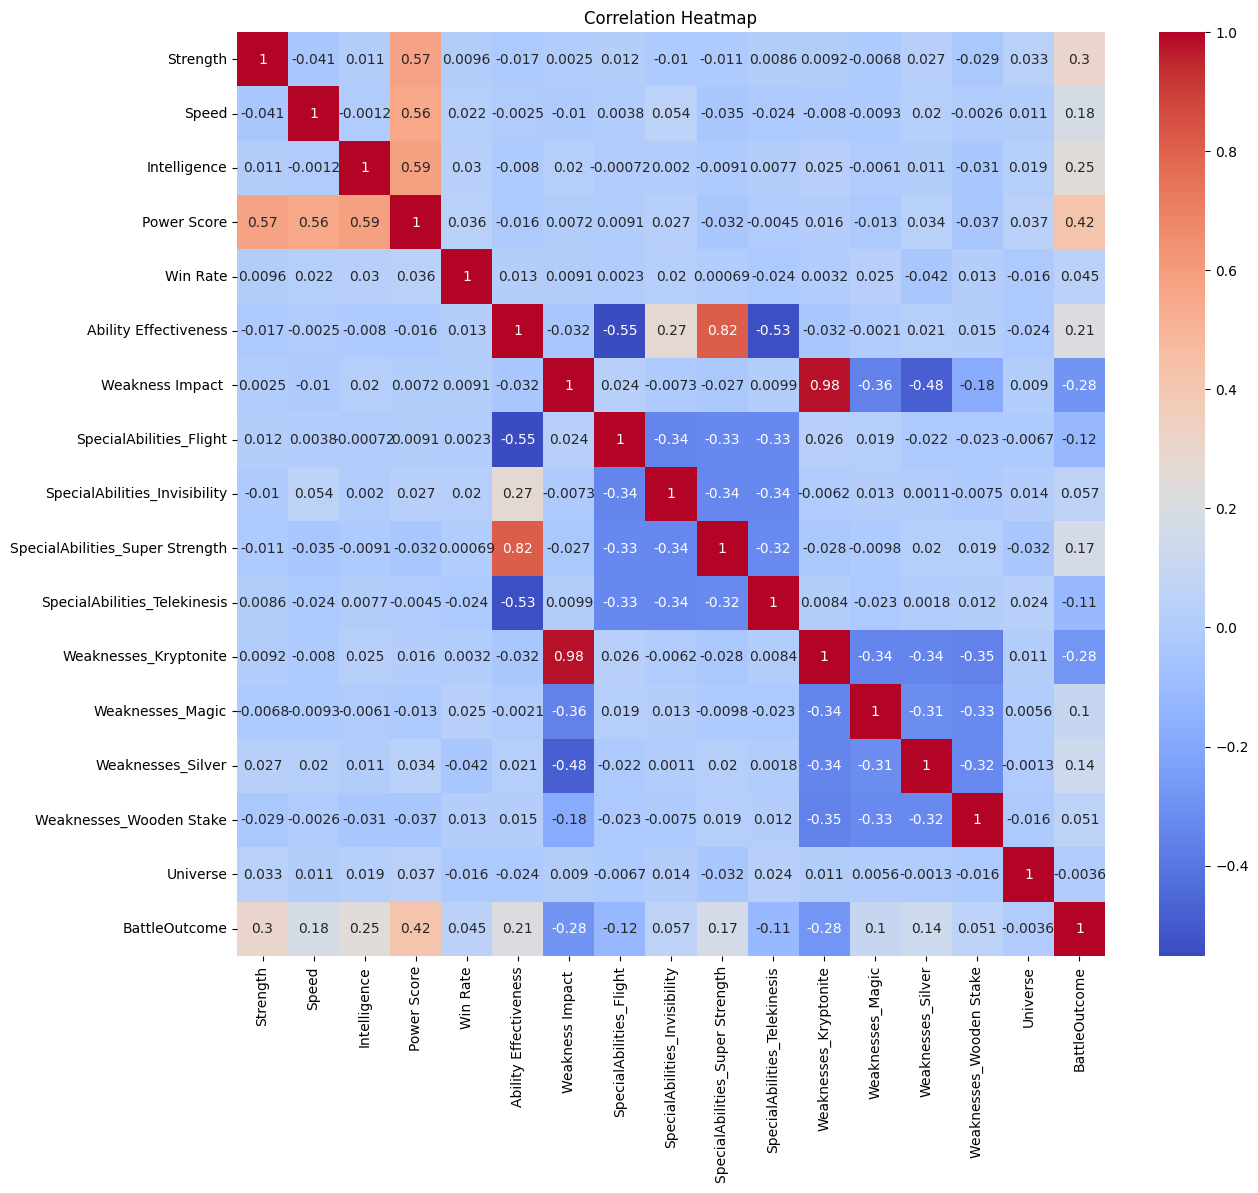

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
print(df_encoded[cols].describe())


          Strength        Speed  Intelligence  Power Score     Win Rate  \
count  2351.000000  2351.000000   2351.000000  2351.000000  2351.000000   
mean      0.493643     0.498322      0.505648     0.479943     0.672103   
std       0.321901     0.317655      0.318171     0.189386     0.334152   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.222222     0.222222      0.222222     0.346154     0.310365   
50%       0.444444     0.555556      0.555556     0.500000     0.799774   
75%       0.777778     0.777778      0.777778     0.615385     0.920081   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

       Ability Effectiveness  Weakness Impact   
count            2351.000000       2351.000000  
mean                0.398505          0.348942  
std                 0.419075          0.404621  
min                 0.000000          0.000000  
25%                 0.000000          0.091940  
50%                 0.588641  

In [22]:
print(df_encoded[cols].min(), df_encoded[cols].max())

Strength                 0.0
Speed                    0.0
Intelligence             0.0
Power Score              0.0
Win Rate                 0.0
Ability Effectiveness    0.0
Weakness Impact          0.0
dtype: float64 Strength                 1.0
Speed                    1.0
Intelligence             1.0
Power Score              1.0
Win Rate                 1.0
Ability Effectiveness    1.0
Weakness Impact          1.0
dtype: float64


In [23]:
df_encoded['power']=df_encoded['Strength']+df_encoded['Intelligence']+df_encoded['Speed']
print(df_encoded)

            Character  Universe  Strength     Speed  Intelligence  \
2236  Captain America         0  0.333333  0.333333      0.111111   
668          Iron Man         0  1.000000  1.000000      0.888889   
2005       Spider-Man         1  0.666667  0.555556      0.000000   
808              Thor         1  0.333333  0.444444      0.888889   
2053             Thor         0  0.444444  0.222222      0.666667   
...               ...       ...       ...       ...           ...   
1638           Batman         0  0.666667  0.444444      0.555556   
1095     Wonder Woman         1  0.222222  0.777778      0.000000   
1130           Batman         1  0.333333  0.000000      0.555556   
1294  Captain America         0  1.000000  0.888889      0.555556   
860          Superman         1  0.111111  0.888889      0.555556   

      BattleOutcome  Power Score  Win Rate  Ability Effectiveness  \
2236              0     0.230769  0.835100               1.000000   
668               1     0.961538 

In [24]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_encoded[['power','Win Rate', 'SpecialAbilities_Flight',
       'SpecialAbilities_Invisibility', 'SpecialAbilities_Super Strength',
       'SpecialAbilities_Telekinesis', 'Weaknesses_Kryptonite',
       'Weaknesses_Magic', 'Weaknesses_Silver', 'Weaknesses_Wooden Stake', 'Universe']]
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                           Features       VIF
0                             power  1.006273
1                          Win Rate  1.004375
2           SpecialAbilities_Flight       inf
3     SpecialAbilities_Invisibility       inf
4   SpecialAbilities_Super Strength       inf
5      SpecialAbilities_Telekinesis       inf
6             Weaknesses_Kryptonite       inf
7                  Weaknesses_Magic       inf
8                 Weaknesses_Silver       inf
9           Weaknesses_Wooden Stake       inf
10                         Universe  1.003292


In [25]:
df_encoded['SpecialAbilities_tofly']=0+df_encoded['SpecialAbilities_Telekinesis']
df_encoded.head(5)

,Character,Universe,Strength,Speed,Intelligence,BattleOutcome,Power Score,Win Rate,Ability Effectiveness,Weakness Impact,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,power,SpecialAbilities_tofly
2236,Captain America,0,0.333333,0.333333,0.111111,0,0.230769,0.835100,1.000000,0.09194,0,0,1,0,0,1,0,0,0.777778,0
668,Iron Man,0,1.000000,1.000000,0.888889,1,0.961538,1.000000,0.000000,0.09194,1,0,0,0,0,1,0,0,2.888889,0
2005,Spider-Man,1,0.666667,0.555556,0.000000,0,0.384615,0.937703,0.588641,0.00000,0,1,0,0,0,0,1,0,1.222222,0
808,Thor,1,0.333333,0.444444,0.888889,0,0.538462,0.648129,0.000000,0.09194,1,0,0,0,0,1,0,0,1.666667,0
2053,Thor,0,0.444444,0.222222,0.666667,0,0.423077,0.648129,0.588641,0.09194,0,1,0,0,0,1,0,0,1.333333,0


In [26]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_encoded[['Universe', 'power','Win Rate',
       'SpecialAbilities_Invisibility', 'SpecialAbilities_Super Strength',
       'Weaknesses_Kryptonite',
       'Weaknesses_Magic', 'Weaknesses_Silver', 'Weaknesses_Wooden Stake','SpecialAbilities_tofly']]
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                          Features       VIF
0                         Universe  1.003292
1                            power  1.006273
2                         Win Rate  1.004375
3    SpecialAbilities_Invisibility  1.505745
4  SpecialAbilities_Super Strength  1.493003
5            Weaknesses_Kryptonite  5.112891
6                 Weaknesses_Magic  4.604812
7                Weaknesses_Silver  4.643269
8          Weaknesses_Wooden Stake  4.782671
9           SpecialAbilities_tofly  1.490961


In [27]:
X.head(10)

,Universe,power,Win Rate,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,SpecialAbilities_tofly
2236,0,0.777778,0.835100,0,1,0,1,0,0,0
668,0,2.888889,1.000000,0,0,0,1,0,0,0
2005,1,1.222222,0.937703,1,0,0,0,1,0,0
808,1,1.666667,0.648129,0,0,0,1,0,0,0
2053,0,1.333333,0.648129,1,0,0,1,0,0,0
350,0,1.333333,0.937703,0,0,1,0,0,0,0
1557,1,2.222222,0.000000,1,0,1,0,0,0,0
111,0,0.444444,0.835100,0,1,1,0,0,0,0
1951,1,1.444444,0.310365,0,1,0,1,0,0,0
1466,1,1.888889,0.920081,0,0,1,0,0,0,1


In [28]:
X=df_encoded[['Character','Universe','Strength','Intelligence', 'Speed', 'power','Win Rate',
       'SpecialAbilities_Invisibility', 'SpecialAbilities_Super Strength',
       'Weaknesses_Kryptonite',
       'Weaknesses_Magic', 'Weaknesses_Silver', 'Weaknesses_Wooden Stake','SpecialAbilities_tofly', 'BattleOutcome']]
X.to_csv('engineered_data.csv', index=False)

In [29]:
dat=pd.read_csv('engineered_data.csv')
dat.head(5)

,Character,Universe,Strength,Intelligence,Speed,power,Win Rate,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,SpecialAbilities_tofly,BattleOutcome
0,Captain America,0,0.333333,0.111111,0.333333,0.777778,0.835100,0,1,0,1,0,0,0,0
1,Iron Man,0,1.000000,0.888889,1.000000,2.888889,1.000000,0,0,0,1,0,0,0,1
2,Spider-Man,1,0.666667,0.000000,0.555556,1.222222,0.937703,1,0,0,0,1,0,0,0
3,Thor,1,0.333333,0.888889,0.444444,1.666667,0.648129,0,0,0,1,0,0,0,0
4,Thor,0,0.444444,0.666667,0.222222,1.333333,0.648129,1,0,0,1,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X=dat.drop(columns=['BattleOutcome', 'Character', 'Strength', 'Intelligence', 'Speed'])
Y=dat['BattleOutcome']

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.20, random_state=42)
model=RandomForestClassifier(max_depth=5, min_samples_split=10,n_estimators=500, random_state=42)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       339
           1       0.70      0.52      0.60       132

    accuracy                           0.80       471
   macro avg       0.77      0.72      0.74       471
weighted avg       0.80      0.80      0.79       471

0.8046709129511678


In [38]:
from sklearn.linear_model import LogisticRegression

X=dat.drop(columns=['BattleOutcome', 'Character', 'Strength', 'Intelligence', 'Speed'])
Y=dat['BattleOutcome']

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.20, random_state=42)

model=LogisticRegression()
model.fit(X_train, Y_train)
y_pred=model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       339
           1       0.69      0.61      0.65       132

    accuracy                           0.81       471
   macro avg       0.77      0.75      0.76       471
weighted avg       0.81      0.81      0.81       471

0.8131634819532909


In [40]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.20, random_state=42)

model=DecisionTreeClassifier(max_depth=5, min_samples_split=10)
model.fit(X_train, Y_train)
y_pred=model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       339
           1       0.66      0.62      0.64       132

    accuracy                           0.80       471
   macro avg       0.76      0.75      0.75       471
weighted avg       0.80      0.80      0.80       471

0.8046709129511678
